In [1]:
import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# color_func 함수, Dark2_8이라는 pallette를 이용하여 색을 만들어냄.
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

# 한글 폰트 지정
font = "NanumPen"
font_path = "%s.ttf" % font

# 아이콘 지정
icon = "apple" 
icon_path = "%s.png" % icon

In [5]:
f = open("stevejobs.txt", 'r', encoding='euc-kr')
stevejobs = f.read()
print(message_of_moon)
f.close()

I am honored to be with you today at your commencement from one of the finest universities in the world. I never graduated from college. Truth be told, this is the closest I've ever gotten to a college graduation. Today I want to tell you three stories from my life. That's it. No big deal. Just three stories.

The first story is about connecting the dots.

I dropped out of Reed College after the first 6 months, but then stayed around as a drop-in for another 18 months or so before I really quit. So why did I drop out?

It started before I was born. My biological mother was a young, unwed college graduate student, and she decided to put me up for adoption. She felt very strongly that I should be adopted by college graduates, so everything was all set for me to be adopted at birth by a lawyer and his wife. Except that when I popped out they decided at the last minute that they really wanted a girl. So my parents, who were on a waiting list, got a call in the middle of the night asking: "

In [6]:
stevejobs = stevejobs.split('\n\n')
stevejobs

["I am honored to be with you today at your commencement from one of the finest universities in the world. I never graduated from college. Truth be told, this is the closest I've ever gotten to a college graduation. Today I want to tell you three stories from my life. That's it. No big deal. Just three stories.",
 'The first story is about connecting the dots.',
 'I dropped out of Reed College after the first 6 months, but then stayed around as a drop-in for another 18 months or so before I really quit. So why did I drop out?',
 'It started before I was born. My biological mother was a young, unwed college graduate student, and she decided to put me up for adoption. She felt very strongly that I should be adopted by college graduates, so everything was all set for me to be adopted at birth by a lawyer and his wife. Except that when I popped out they decided at the last minute that they really wanted a girl. So my parents, who were on a waiting list, got a call in the middle of the nigh

In [7]:
# 연설문 1번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus1 = tf_vectorizer.fit(stevejobs)
tf_bow1 = tf_vectorizer.fit_transform(stevejobs)
tf_bow1

<27x691 sparse matrix of type '<class 'numpy.int64'>'
	with 1480 stored elements in Compressed Sparse Row format>

In [8]:
# 연설문 1 
# check vocabulary in TDM
print(len(tf_corpus1.vocabulary_))
print(len(tf_corpus1.get_feature_names()))
tf_vectorizer.get_feature_names()

691
691


['000',
 '10',
 '17',
 '18',
 '1960s',
 '1970s',
 '20',
 '30',
 '33',
 '35',
 'about',
 'across',
 'adopted',
 'adoption',
 'adult',
 'adventurous',
 'advised',
 'affairs',
 'after',
 'again',
 'age',
 'agent',
 'ago',
 'all',
 'almost',
 'along',
 'already',
 'always',
 'am',
 'amazing',
 'amount',
 'an',
 'and',
 'anew',
 'animated',
 'animation',
 'another',
 'answer',
 'any',
 'apologize',
 'apple',
 'application',
 'approach',
 'are',
 'around',
 'artistically',
 'as',
 'asked',
 'asking',
 'at',
 'avoid',
 'away',
 'awful',
 'baby',
 'back',
 'backward',
 'badly',
 'baton',
 'be',
 'beautiful',
 'beautifully',
 'because',
 'become',
 'been',
 'before',
 'began',
 'begin',
 'beginner',
 'being',
 'believe',
 'beneath',
 'best',
 'better',
 'between',
 'bibles',
 'big',
 'billion',
 'biological',
 'biopsy',
 'birth',
 'bit',
 'board',
 'bob',
 'born',
 'bottles',
 'bought',
 'boy',
 'brand',
 'brick',
 'brought',
 'but',
 'buttoned',
 'buy',
 'by',
 'call',
 'called',
 'calligraphe

In [9]:
# 연설문 1
# frequency count
tf_word_sum1 = tf_bow1.toarray().sum(axis=0)
tf_word_name1 = tf_corpus1.get_feature_names()
tf_word_dict1 = {}

for i in range(len(tf_word_sum1)):
    tf_word_dict1[tf_word_name1[i]] = tf_word_sum1[i]
    
print(tf_corpus1.get_feature_names())
tf_word_sum1

['000', '10', '17', '18', '1960s', '1970s', '20', '30', '33', '35', 'about', 'across', 'adopted', 'adoption', 'adult', 'adventurous', 'advised', 'affairs', 'after', 'again', 'age', 'agent', 'ago', 'all', 'almost', 'along', 'already', 'always', 'am', 'amazing', 'amount', 'an', 'and', 'anew', 'animated', 'animation', 'another', 'answer', 'any', 'apologize', 'apple', 'application', 'approach', 'are', 'around', 'artistically', 'as', 'asked', 'asking', 'at', 'avoid', 'away', 'awful', 'baby', 'back', 'backward', 'badly', 'baton', 'be', 'beautiful', 'beautifully', 'because', 'become', 'been', 'before', 'began', 'begin', 'beginner', 'being', 'believe', 'beneath', 'best', 'better', 'between', 'bibles', 'big', 'billion', 'biological', 'biopsy', 'birth', 'bit', 'board', 'bob', 'born', 'bottles', 'bought', 'boy', 'brand', 'brick', 'brought', 'but', 'buttoned', 'buy', 'by', 'call', 'called', 'calligraphed', 'calligraphy', 'came', 'cameras', 'campus', 'can', 'cancer', 'capture', 'catalog', 'cells', 

array([ 1,  4,  2,  1,  1,  1,  1,  3,  1,  1, 10,  1,  2,  2,  1,  1,  1,
        1,  2,  2,  1,  1,  1, 16,  3,  1,  2,  1,  2,  2,  1,  6, 67,  1,
        1,  1,  2,  1,  2,  1,  9,  1,  1,  2,  1,  1, 15,  1,  1, 11,  1,
        3,  1,  1,  3,  2,  1,  1, 14,  2,  1,  4,  3,  5,  4,  2,  2,  1,
        4,  1,  1,  5,  2,  1,  1,  2,  1,  2,  1,  1,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  1, 14,  1,  1,  6,  1,  1,  1,  3,  2,  1,  1,  5,
        3,  1,  2,  2,  2,  1,  2,  1,  1,  1,  3,  2,  1,  1,  1,  1,  3,
        1,  1, 14,  1,  1,  5,  4,  2,  1,  4,  1,  1,  1,  2,  1,  2,  1,
        4,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  6,
        1,  5,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  5,  6,  4,  1,
        1,  1,  1, 11,  2,  2,  1,  7,  1,  4,  3,  1,  1,  3,  7,  1,  1,
        1,  1,  1,  2,  2,  1,  2,  1,  1,  1,  1,  1,  2,  1,  1,  4,  1,
        2,  1,  5,  5,  6,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,
        2,  1,  1,  1,  1

In [10]:
# 연설문 1
# 단어별 글자수 확인
tf_word_dict1

{'000': 1,
 '10': 4,
 '17': 2,
 '18': 1,
 '1960s': 1,
 '1970s': 1,
 '20': 1,
 '30': 3,
 '33': 1,
 '35': 1,
 'about': 10,
 'across': 1,
 'adopted': 2,
 'adoption': 2,
 'adult': 1,
 'adventurous': 1,
 'advised': 1,
 'affairs': 1,
 'after': 2,
 'again': 2,
 'age': 1,
 'agent': 1,
 'ago': 1,
 'all': 16,
 'almost': 3,
 'along': 1,
 'already': 2,
 'always': 1,
 'am': 2,
 'amazing': 2,
 'amount': 1,
 'an': 6,
 'and': 67,
 'anew': 1,
 'animated': 1,
 'animation': 1,
 'another': 2,
 'answer': 1,
 'any': 2,
 'apologize': 1,
 'apple': 9,
 'application': 1,
 'approach': 1,
 'are': 2,
 'around': 1,
 'artistically': 1,
 'as': 15,
 'asked': 1,
 'asking': 1,
 'at': 11,
 'avoid': 1,
 'away': 3,
 'awful': 1,
 'baby': 1,
 'back': 3,
 'backward': 2,
 'badly': 1,
 'baton': 1,
 'be': 14,
 'beautiful': 2,
 'beautifully': 1,
 'because': 4,
 'become': 3,
 'been': 5,
 'before': 4,
 'began': 2,
 'begin': 2,
 'beginner': 1,
 'being': 4,
 'believe': 1,
 'beneath': 1,
 'best': 5,
 'better': 2,
 'between': 1,
 'bibl

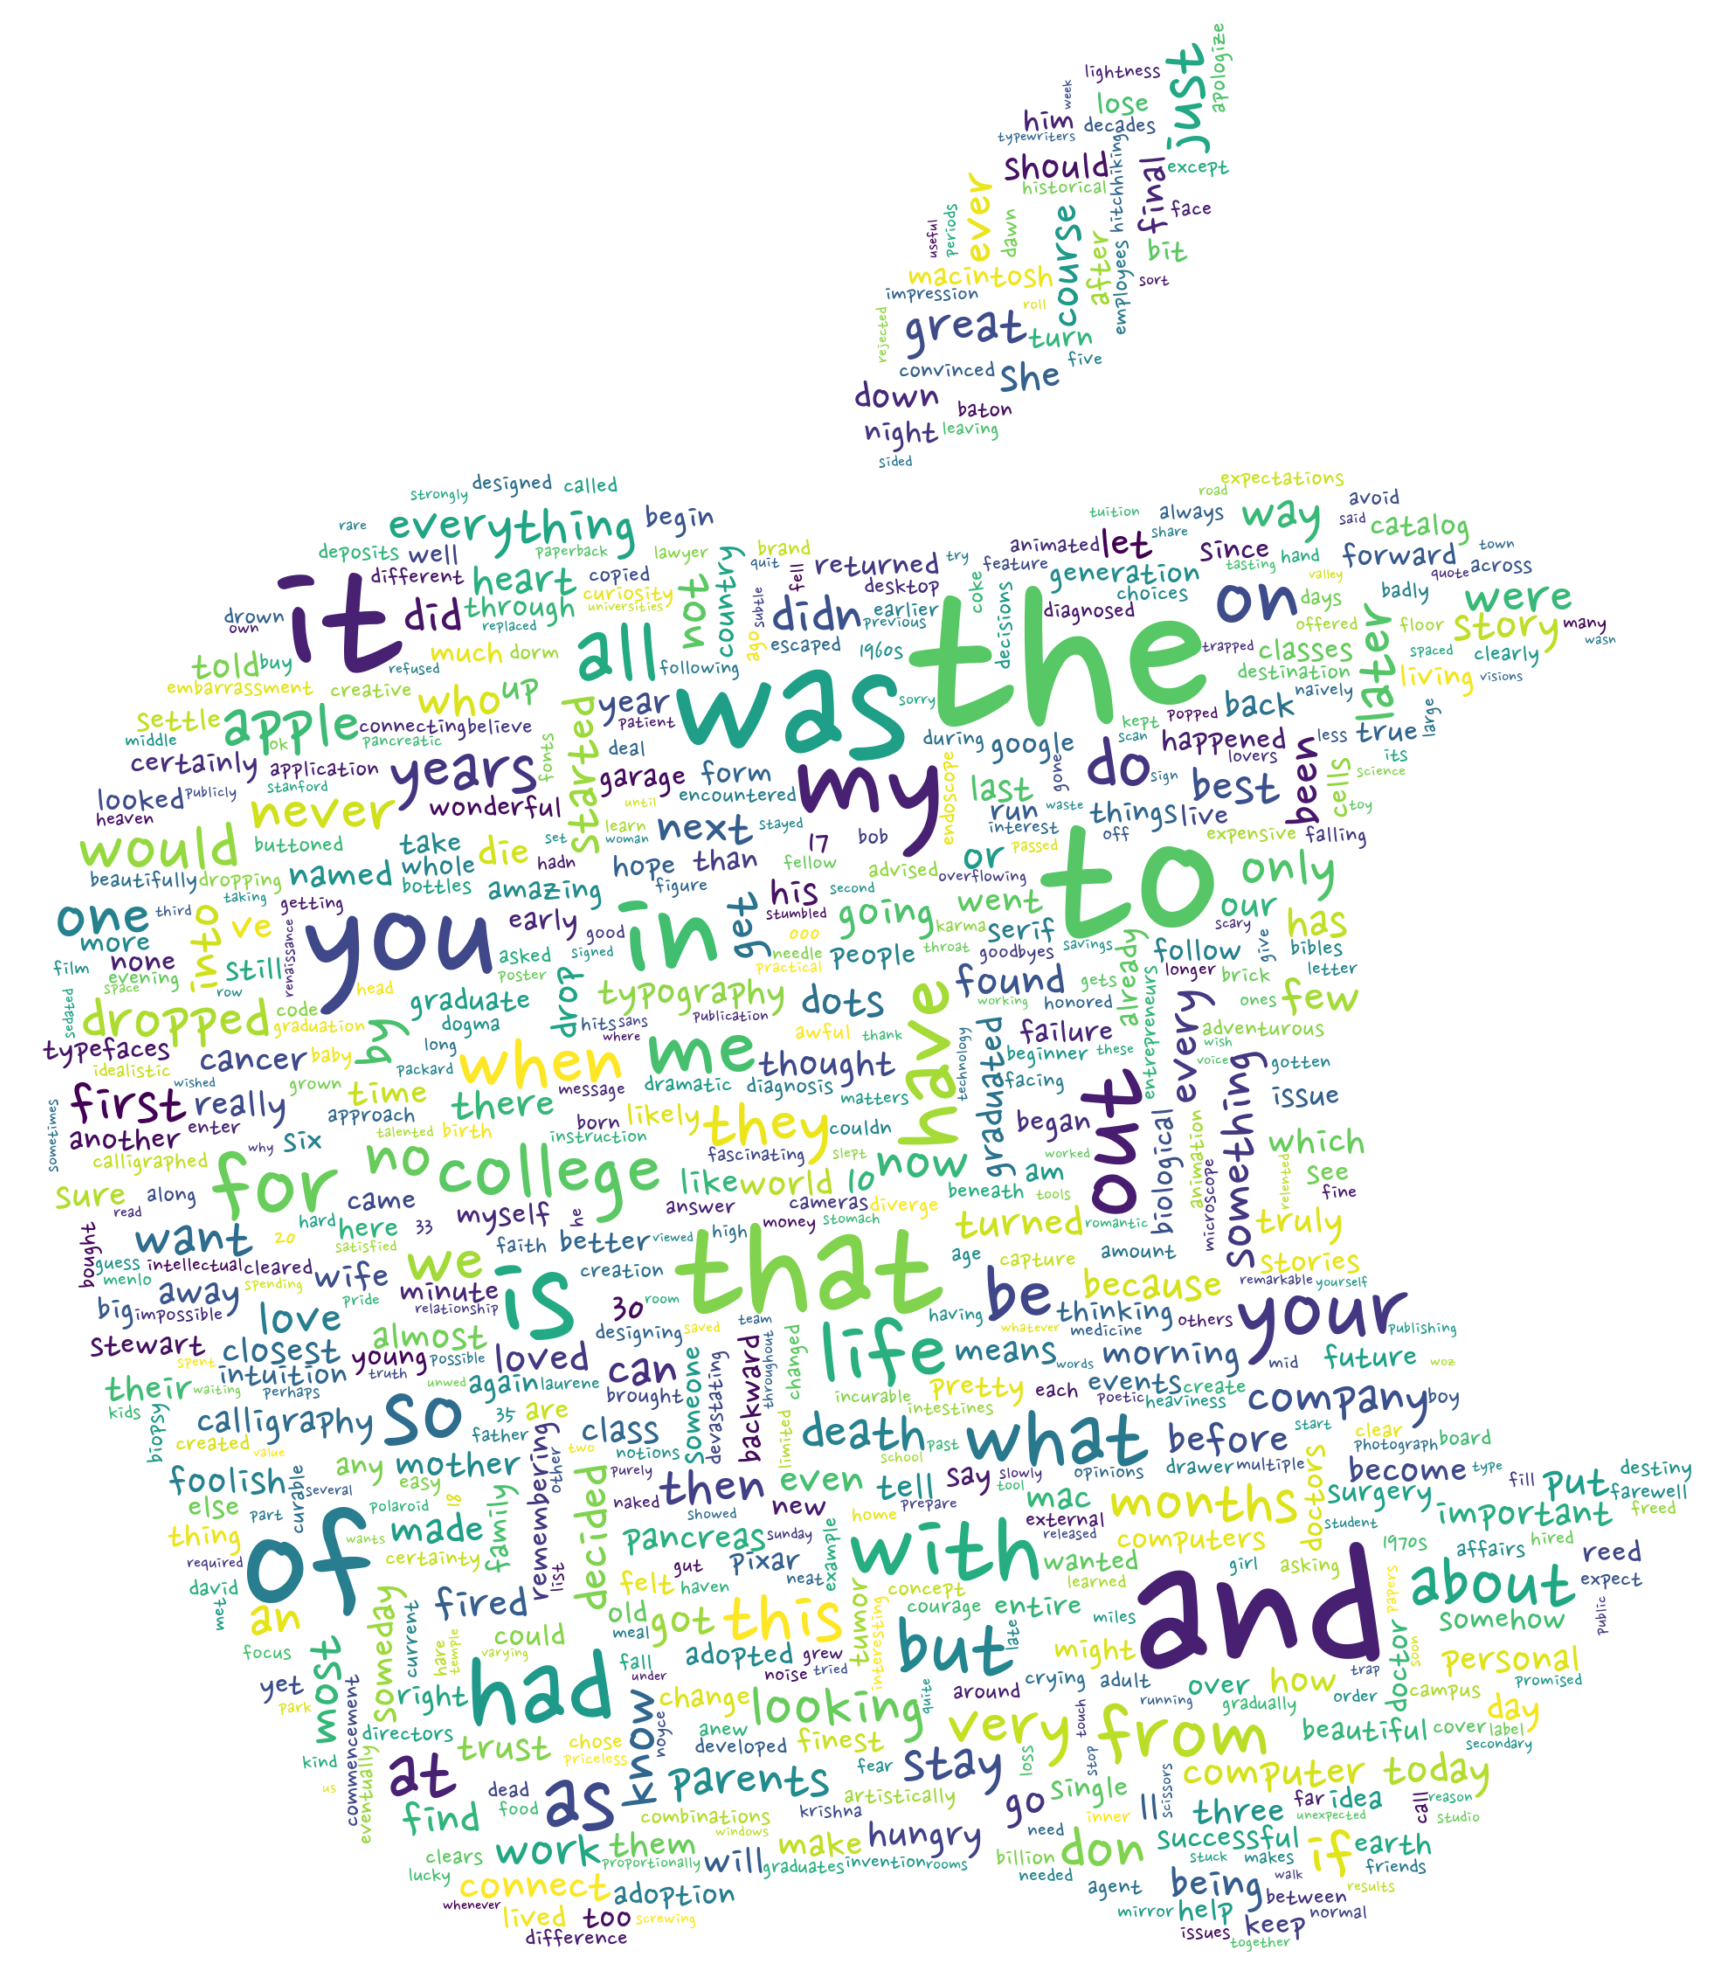

In [19]:
# 연설문 1
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict1)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("stevejobs.png") # 그림파일로 추출하기